## Question 2(a): Wall clock time

Grid Size: 10, Wall-Clock Time: 1e-06 seconds
Grid Size: 20, Wall-Clock Time: 0.005615949630737305 seconds
Grid Size: 40, Wall-Clock Time: 1.3209636211395264 seconds
Grid Size: 80, Wall-Clock Time: 3.68677020072937 seconds
Grid Size: 160, Wall-Clock Time: 92.64003729820251 seconds
Fit: T_n = 7.974436990002655e-12 * n^6.228887678014529


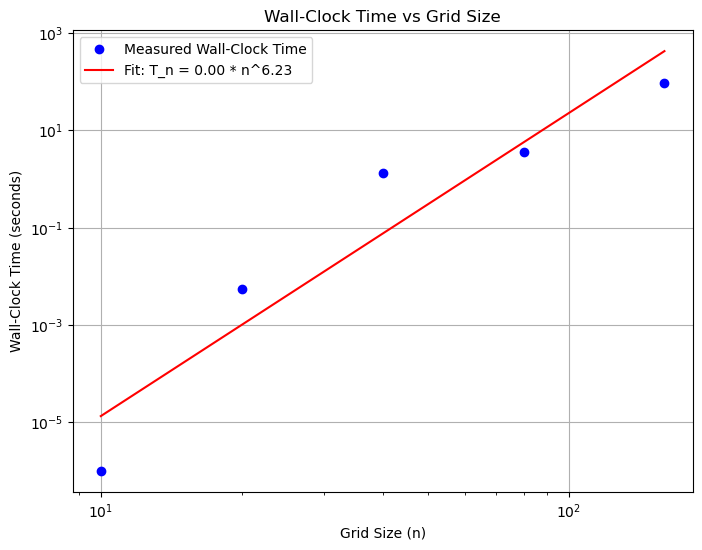

In [27]:
import numpy as np
from math import *
import sys
import time
import matplotlib.pyplot as plt

s=sqrt(0.75)

# Function to map an interior index (i,j) into the vector index
def ind(i,j,n):
    return i-1+(j-1)*(2*n-2-j)//2

# Source term for the desired reference solution
def fun(x,y):
    return -8*(sqrt(3)-2*y)*cos(y)+4*(-4-3*x+3*x*x+sqrt(3)*y-y*y)*sin(y)

# Reference solution
def uex(x,y):
    return ((2*y-sqrt(3))**2-3*(2*x-1)**2)*sin(y)

# Function to check whether an index pair (i,j) is the interior of the grid
def inrange(i,j,n):
    return i>0 and j>0 and i+j<n

def poisson_tri(n):
    h=1./n
    m=(n-1)*(n-2)//2

    # Create derivative matrix and source term
    d=np.zeros((m,m))
    f=np.empty((m))
    hfac=1/(3*h*h)
    for j in range(1,n):
        for i in range(1,n-j):
            ij=ind(i,j,n)

            # Derivative matrix
            d[ij,ij]=-12*hfac
            if(inrange(i+1,j,n)): d[ij,ind(i+1,j,n)]=2*hfac
            if(inrange(i,j-1,n)): d[ij,ind(i,j-1,n)]=2*hfac
            if(inrange(i-1,j+1,n)): d[ij,ind(i-1,j+1,n)]=2*hfac

            # Additional lines for the stencil in part (b)
            if(inrange(i-1,j,n)): d[ij,ind(i-1,j,n)]=2*hfac
            if(inrange(i,j+1,n)): d[ij,ind(i,j+1,n)]=2*hfac
            if(inrange(i+1,j-1,n)): d[ij,ind(i+1,j-1,n)]=2*hfac

            # Source term
            f[ij]=fun(h*(i+0.5*j),h*s*j)

    start = time.time()
    # Solve the linear system
    u=np.linalg.solve(d,f)
    end = time.time()

    # Compute error
    uerr=0
    for j in range(1,n):
        for i in range(1,n-j):
            du=uex(h*(i+0.5*j),h*s*j)-u[ind(i,j,n)]
            uerr+=du*du
    wall_clock_time = end - start
    return wall_clock_time

sizes = [10, 20, 40, 80, 160]
times = []
for n in sizes:
    time_n = poisson_tri(n)
    time_n = max(time_n, 1e-6)  
    # This helps in avoiding NaN values for a and b
    times.append(time_n)
    print(f"Grid Size: {n}, Wall-Clock Time: {times[-1]} seconds")

# Fit timing data to the model T_n = a * n^b
coefficients = np.polyfit(np.log(sizes), np.log(times), 1)
a = np.exp(coefficients[1])
b = coefficients[0]
print(f"Fit: T_n = {a} * n^{b}")

plt.figure(figsize=(8, 6))
plt.loglog(sizes, times, 'bo', label='Measured Wall-Clock Time')
plt.loglog(sizes, a * np.power(sizes, b), 'r-', label=f'Fit: T_n = {a:.2f} * n^{b:.2f}')
plt.xlabel('Grid Size (n)')
plt.ylabel('Wall-Clock Time (seconds)')
plt.title('Wall-Clock Time vs Grid Size')
plt.legend()
plt.grid(True)
plt.show()